# Introduction to the xgbsurv package

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [11]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
#from xgbsurv.models import aft_baseline_hazard_estimator
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


ImportError: cannot import name 'aft_baseline_hazard_estimator' from 'xgbsurv.models' (/Users/JUSC/miniconda3/envs/xgbsurv/lib/python3.10/site-packages/xgbsurv/models/__init__.py)

## Load Data

In [3]:
data = load_metabric(path="/Users/JUSC/Documents/xgbsurv/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

## Load Model

In [4]:
model = XGBSurv(n_estimators=25, objective="aft_objective",
                                             eval_metric="aft_loss",
                                             learning_rate=0.3,
                                             random_state=7, 
                                             disable_default_eval_metric=True)

The options of loss and objective functions can be obtained like below:

In [5]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [6]:
eval_set = [(X_train, y_train)]

In [7]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-aft_likelihood:3.11824
[1]	validation_0-aft_likelihood:3.11824
[2]	validation_0-aft_likelihood:3.11824
[3]	validation_0-aft_likelihood:3.11824
[4]	validation_0-aft_likelihood:3.11824
[5]	validation_0-aft_likelihood:3.11824
[6]	validation_0-aft_likelihood:3.11824
[7]	validation_0-aft_likelihood:3.11824
[8]	validation_0-aft_likelihood:3.11824
[9]	validation_0-aft_likelihood:3.11824
[10]	validation_0-aft_likelihood:3.11824
[11]	validation_0-aft_likelihood:3.11824
[12]	validation_0-aft_likelihood:3.11824
[13]	validation_0-aft_likelihood:3.11824
[14]	validation_0-aft_likelihood:3.11824
[15]	validation_0-aft_likelihood:3.11824
[16]	validation_0-aft_likelihood:3.11824
[17]	validation_0-aft_likelihood:3.11824
[18]	validation_0-aft_likelihood:3.11824
[19]	validation_0-aft_likelihood:3.11824
[20]	validation_0-aft_likelihood:3.11824
[21]	validation_0-aft_likelihood:3.11824
[22]	validation_0-aft_likelihood:3.11824
[23]	validation_0-aft_likelihood:3.11824
[24]	validation_0-aft_like

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=True, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function aft_likelihood at 0x7f8129b7bd00>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=25, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function aft_objective at 0x7f8129bb8af0>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [8]:
model.save_model("introduction_model_breslow.json")

## Predict

In [9]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [10]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.head(3)

KeyboardInterrupt: 

## Predict Survival Function

In [ ]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
335.600006,0.000529,0.063709,0.000069,0.000022,2.383518e-20,0.016777,0.004039,2.702898e-41,0.011218,0.000065,...,0.007239,0.128352,0.067446,0.099142,0.171123,0.000001,0.000801,0.000965,0.085625,0.0647
335.733337,0.000529,0.063709,0.000069,0.000022,2.383518e-20,0.016777,0.004039,2.702898e-41,0.011218,0.000065,...,0.007239,0.128352,0.067446,0.099142,0.171123,0.000001,0.000801,0.000965,0.085625,0.0647
351.000000,0.000529,0.063709,0.000069,0.000022,2.383518e-20,0.016777,0.004039,2.702898e-41,0.011218,0.000065,...,0.007239,0.128352,0.067446,0.099142,0.171123,0.000001,0.000801,0.000965,0.085625,0.0647


### Visualize Predictions

Text(0.5, 1.0, 'Survival Curve Test Set')

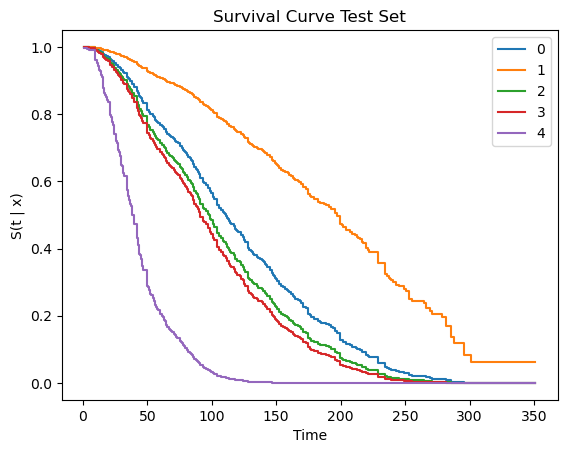

In [ ]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Test Set")

## Evaluate

In [ ]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.632643010808429


In [ ]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.1823026110315267
